In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import zipfile

local_zip = '/content/drive/MyDrive/Database/archive.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [ ]:
base_dir = 'human detection dataset'

# Directory with our training human pictures
train_h_dir = os.path.join(base_dir, '1')

# Directory with our training non human pictures
train_nh_dir = os.path.join(base_dir, '0')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        base_dir,  # This is the source directory for training images
        target_size=(256, 256),  # All images will be resized to 224x224
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 921 images belonging to 2 classes.


In [ ]:
unique, counts = np.unique(train_generator.classes, return_counts=True)

In [ ]:
print(np.asarray((unique, counts)).T)

[[  0 362]
 [  1 559]]


In [ ]:
train_h_fnames = os.listdir(train_h_dir)
print(train_h_fnames[:10])

train_nh_fnames = os.listdir(train_nh_dir)
train_nh_fnames.sort()
print(train_nh_fnames[:10])

['22.png', '417.png', '350.png', '30.png', '209.png', '249.png', '317.png', '403.png', '432.png', '374.png']
['0.png', '1.png', '10.png', '100.png', '101.png', '102.png', '103.png', '104.png', '105.png', '106.png']


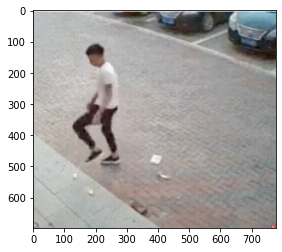

In [ ]:
plt.imshow(mpimg.imread(os.path.join(train_h_dir, train_h_fnames[0])))

In [ ]:
#Basic model for image classification with 2 hidden layers of 300 and 100 neurons respectively
model = tf.keras.Sequential()

model.add(tf.keras.Input(shape=(256,256,3)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu", name="HiddenLayer1"))
model.add(tf.keras.layers.Dense(100, activation="relu", name="HiddenLayer2"))
model.add(tf.keras.layers.Dense(2, activation="softmax", name="Output_Layer"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 196608)            0         
                                                                 
 HiddenLayer1 (Dense)        (None, 300)               58982700  
                                                                 
 HiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 Output_Layer (Dense)        (None, 2)                 202       
                                                                 
Total params: 59,013,002
Trainable params: 59,013,002
Non-trainable params: 0
_________________________________________________________________


In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001) #if learning rate is not specified, it takes the default value = 0.001

model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [ ]:
history = model.fit(train_generator, epochs=10)

Epoch 1/10
47/47 [==============================] - 14s 248ms/step - loss: 32.5538 - accuracy: 0.5375
Epoch 2/10
47/47 [==============================] - 11s 225ms/step - loss: 12.0136 - accuracy: 0.5624
Epoch 3/10
47/47 [==============================] - 11s 229ms/step - loss: 6.7471 - accuracy: 0.5722
Epoch 4/10
47/47 [==============================] - 11s 230ms/step - loss: 2.6078 - accuracy: 0.6113
Epoch 5/10
47/47 [==============================] - 11s 231ms/step - loss: 2.5329 - accuracy: 0.5983
Epoch 6/10
47/47 [==============================] - 12s 262ms/step - loss: 2.6754 - accuracy: 0.5831
Epoch 7/10
47/47 [==============================] - 11s 229ms/step - loss: 3.2625 - accuracy: 0.5733
Epoch 8/10
47/47 [==============================] - 11s 234ms/step - loss: 1.2948 - accuracy: 0.6037
Epoch 9/10
47/47 [==============================] - 11s 230ms/step - loss: 0.5775 - accuracy: 0.7383
Epoch 10/10
47/47 [==============================] - 11s 231ms/step - loss: 0.5578 - accu

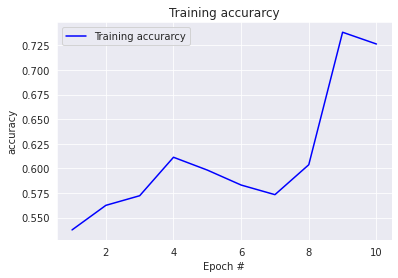

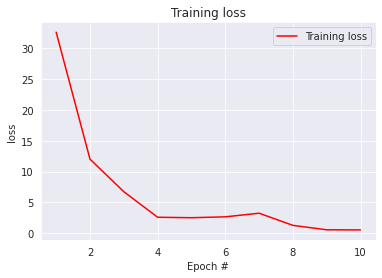

In [ ]:
sns.set_style("darkgrid")

#get the details form the history object which has the training results
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training accurarcy')
plt.legend()

#Train and validation loss
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [ ]:
#VGGnet16
from tensorflow.keras.applications.vgg16 import VGG16
v_model = VGG16(input_shape=(256,256,3), weights='imagenet', include_top=False)
v_model.trainable = False #freeze the layers
v_model.summary()

58889256/58889256 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                              

In [ ]:
import tensorflow as tf
model1 = tf.keras.Sequential([
    v_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model1.summary()

model1.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 2)                 65538     
                                                                 
Total params: 14,780,226
Trainable params: 65,538
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
history = model1.fit(train_generator,epochs=5,verbose=1)

Epoch 1/5
47/47 [==============================] - 21s 285ms/step - loss: 0.5465 - acc: 0.7188
Epoch 2/5
47/47 [==============================] - 13s 264ms/step - loss: 0.3783 - acc: 0.8360
Epoch 3/5
47/47 [==============================] - 13s 265ms/step - loss: 0.3038 - acc: 0.8936
Epoch 4/5
47/47 [==============================] - 13s 268ms/step - loss: 0.2539 - acc: 0.9316
Epoch 5/5
47/47 [==============================] - 14s 290ms/step - loss: 0.2141 - acc: 0.9544


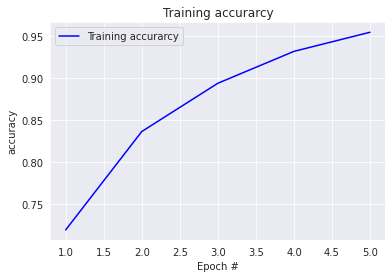

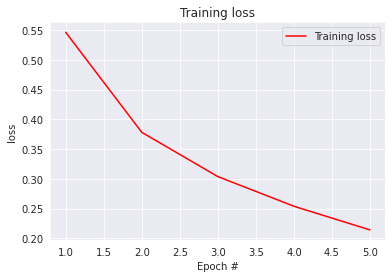

In [ ]:
sns.set_style("darkgrid")

#get the details form the history object which has the training results
acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training accurarcy')
plt.legend()

#Train and validation loss
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [ ]:
from tensorflow.keras.applications import InceptionV3
i_model = InceptionV3(input_shape=(256,256,3), weights='imagenet', include_top=False)
i_model.trainable = False #freeze the layers
i_model.summary()

87910968/87910968 [==============================] - 5s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)           

In [ ]:
import tensorflow as tf
model2 = tf.keras.Sequential([
    i_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model2.summary()

model2.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 flatten_2 (Flatten)         (None, 73728)             0         
                                                                 
 dense_1 (Dense)             (None, 2)                 147458    
                                                                 
Total params: 21,950,242
Trainable params: 147,458
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
history = model2.fit(train_generator,epochs=5,verbose=1)

Epoch 1/5
47/47 [==============================] - 19s 278ms/step - loss: 0.6903 - acc: 0.7264
Epoch 2/5
47/47 [==============================] - 12s 248ms/step - loss: 0.1880 - acc: 0.9229
Epoch 3/5
47/47 [==============================] - 12s 251ms/step - loss: 0.0813 - acc: 0.9794
Epoch 4/5
47/47 [==============================] - 12s 247ms/step - loss: 0.0371 - acc: 0.9967
Epoch 5/5
47/47 [==============================] - 13s 270ms/step - loss: 0.0269 - acc: 0.9957


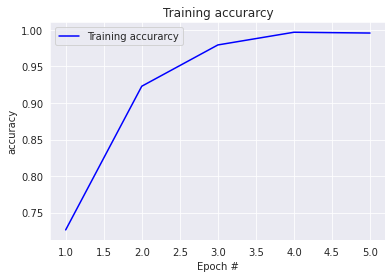

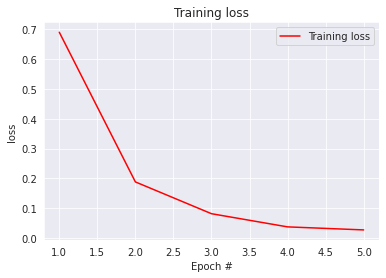

In [ ]:
sns.set_style("darkgrid")

#get the details form the history object which has the training results
acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training accurarcy')
plt.legend()

#Train and validation loss
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training loss')
plt.legend()

plt.show()

Here, I have experimented with 3 models Basic model, VGG16net and googlenet model. Out of these 3, googlenet has come out to be the winner with highest accuracy rate and lowest loss.